In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
from scipy.stats import zscore

In [2]:
togo_data = pd.read_csv('../data/togo-dapaong_qc.csv')
togo_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [3]:
togo_data.shape

(525600, 19)

In [4]:
data_types = togo_data.dtypes
data_types

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [5]:
missing_values = togo_data.isnull().sum()
missing_values

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [6]:
togo_data.duplicated().sum()

np.int64(0)

In [7]:
togo_data.drop('Comments', axis=1)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-24 23:56,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525596,2022-10-24 23:57,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0
525597,2022-10-24 23:58,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9
525598,2022-10-24 23:59,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8


In [8]:
summary_stats = togo_data.describe()
print("Summary Statistics: \n", summary_stats)

Summary Statistics: 
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      230.555040     151.258469     116.444352     226.144375   
std       322.532347     250.956962     156.520714     317.346938   
min       -12.700000       0.000000       0.000000       0.000000   
25%        -2.200000       0.000000       0.000000       0.000000   
50%         2.100000       0.000000       2.500000       4.400000   
75%       442.400000     246.400000     215.700000     422.525000   
max      1424.000000    1004.500000     805.700000    1380.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      219.568588      27.751788      55.013160       2.368093   
std       307.932510       4.758023      28.778732       1.462668   
min         0.000000      14.900000       3.300000       0.000000   
25%        

In [9]:
# Check for outliers (e.g., in GHI, DNI, DHI)
outliers = togo_data[(togo_data['GHI'] < 0) | (togo_data['DNI'] < 0) | (togo_data['DHI'] < 0)]
print("Outliers:\n", outliers)

Outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-10-25 00:01 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1       2021-10-25 00:02 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2       2021-10-25 00:03 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3       2021-10-25 00:04 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4       2021-10-25 00:05 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
525596  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
525597  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
525598  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
525599  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

        WSstdev     WD  WDst

In [10]:
# Convert Timestamp to datetime
togo_data['Timestamp'] = pd.to_datetime(togo_data['Timestamp'])

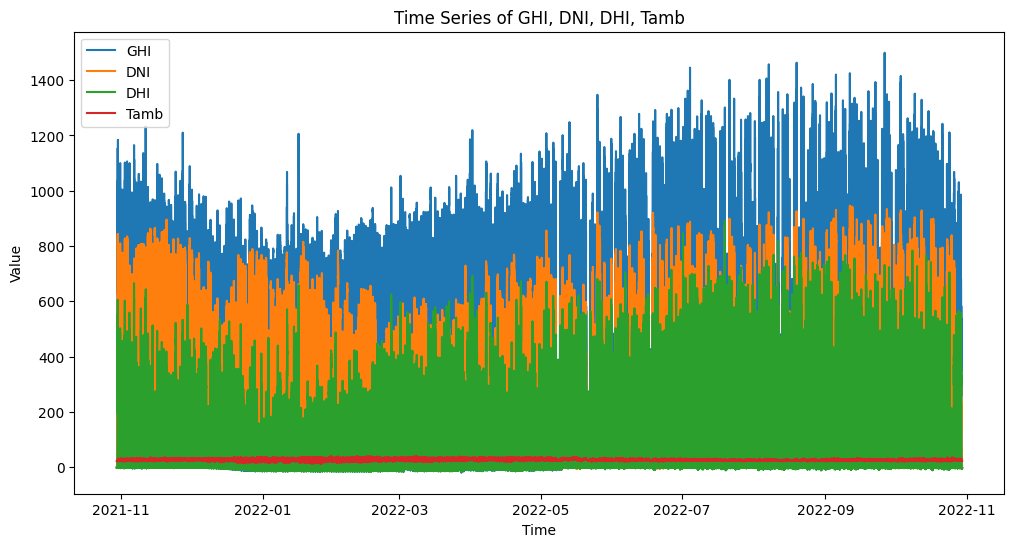

In [ ]:
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(togo_data['Timestamp'], togo_data['GHI'], label='GHI')
mp.pyplot.plot(togo_data['Timestamp'], togo_data['DNI'], label='DNI')
mp.pyplot.plot(togo_data['Timestamp'], togo_data['DHI'], label='DHI')
mp.pyplot.plot(togo_data['Timestamp'], togo_data['Tamb'], label='Tamb')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('Value')
mp.pyplot.title('Time Series of GHI, DNI, DHI, Tamb')
mp.pyplot.legend()
mp.pyplot.show()

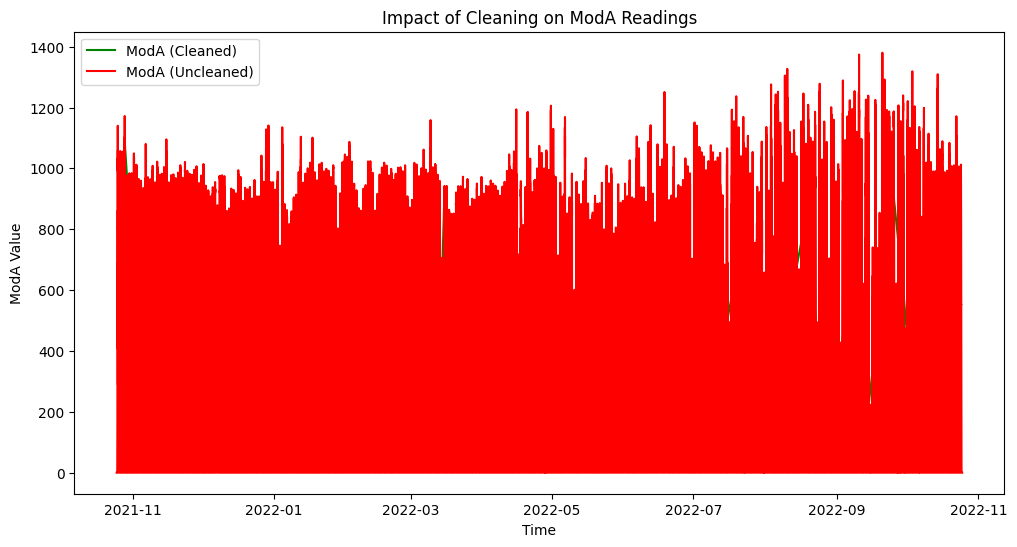

In [11]:
cleaned_data = togo_data[togo_data['Cleaning'] == 1]
uncleaned_data = togo_data[togo_data['Cleaning'] == 0]

mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.plot(cleaned_data['Timestamp'], cleaned_data['ModA'], label='ModA (Cleaned)', color='green')
mp.pyplot.plot(uncleaned_data['Timestamp'], uncleaned_data['ModA'], label='ModA (Uncleaned)', color='red')
mp.pyplot.xlabel('Time')
mp.pyplot.ylabel('ModA Value')
mp.pyplot.title('Impact of Cleaning on ModA Readings')
mp.pyplot.legend()
mp.pyplot.show()

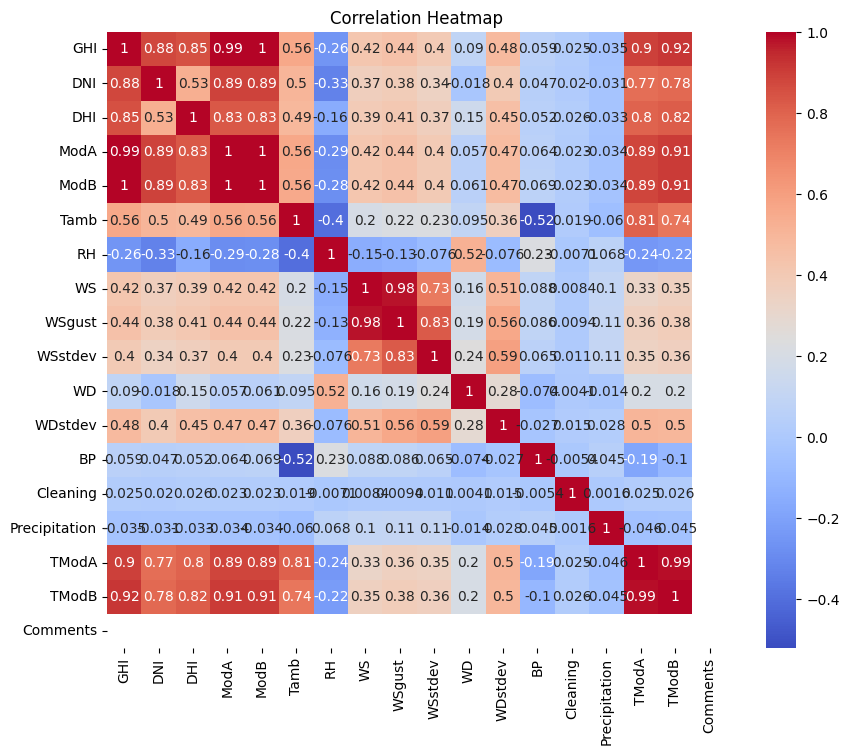

In [12]:
mp.pyplot.figure(figsize=(10, 8))
corr = togo_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
mp.pyplot.title('Correlation Heatmap')
mp.pyplot.show()

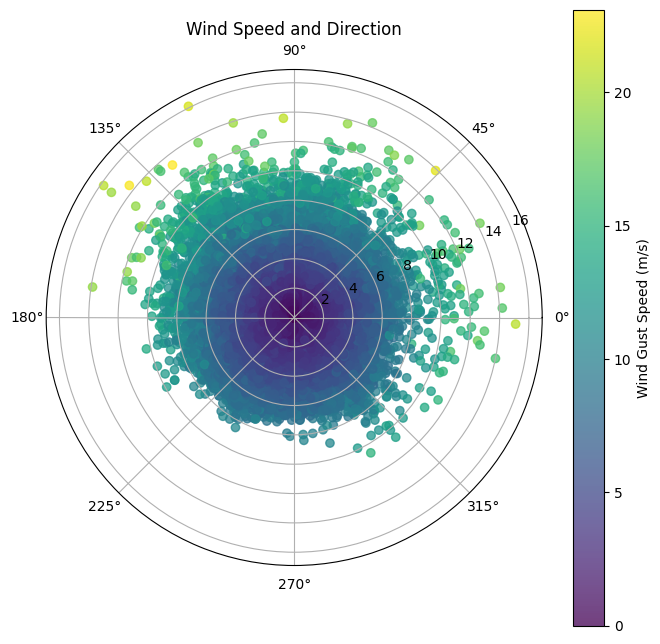

In [13]:

mp.pyplot.figure(figsize=(8, 8))
mp.pyplot.subplot(projection='polar')
# mp.pyplot.scatter(benin_data['WD'] * np.pi / 180, benin_data['WS'], c=benin_data['WSgust'], cmap=mp.viridis, alpha=0.75)
mp.pyplot.scatter(togo_data['WD'] * np.pi / 180, togo_data['WS'], c=togo_data['WSgust'], alpha=0.75)
mp.pyplot.colorbar(label='Wind Gust Speed (m/s)')
mp.pyplot.title('Wind Speed and Direction')
mp.pyplot.show()

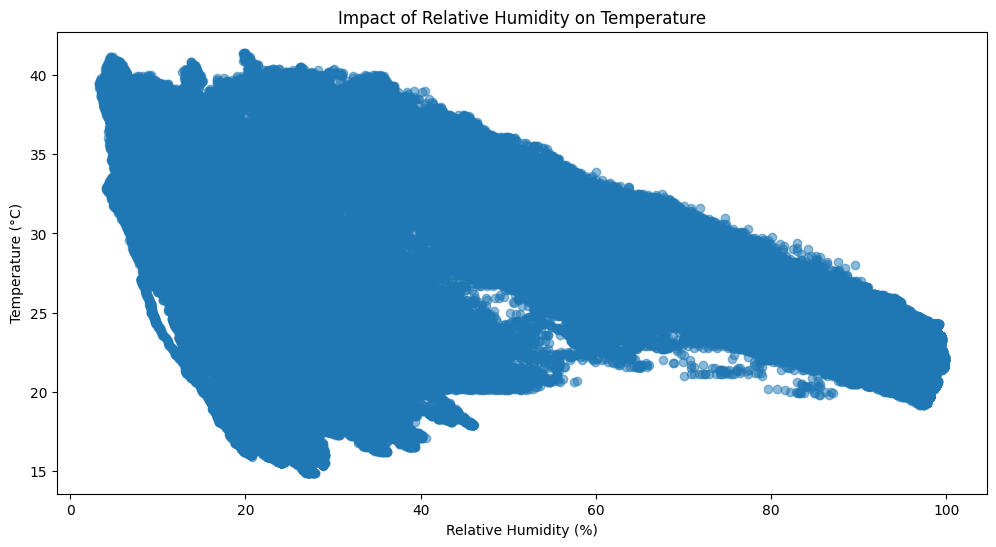

In [14]:
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(togo_data['RH'], togo_data['Tamb'], alpha=0.5)
mp.pyplot.xlabel('Relative Humidity (%)')
mp.pyplot.ylabel('Temperature (°C)')
mp.pyplot.title('Impact of Relative Humidity on Temperature')
mp.pyplot.show()

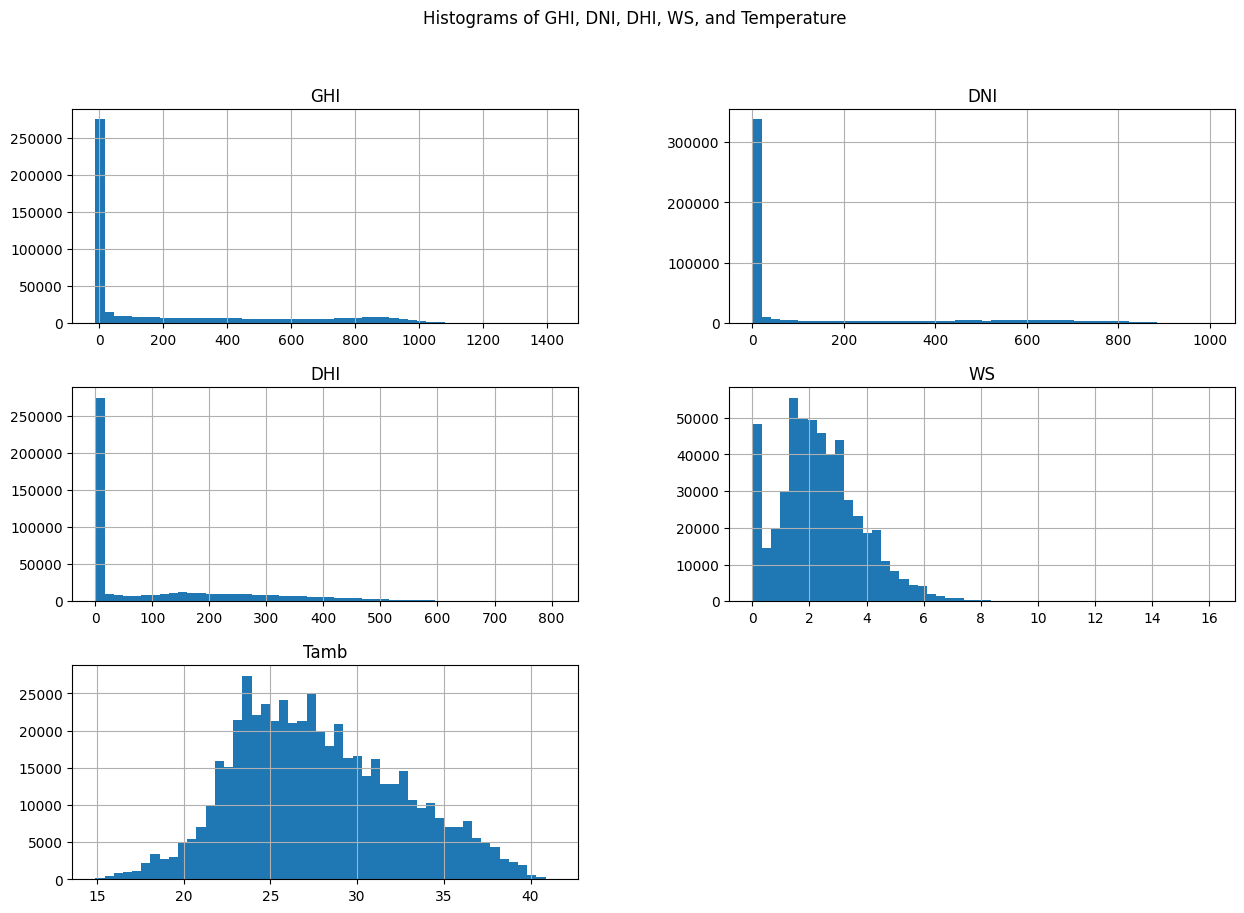

In [15]:
# Create histograms for GHI, DNI, DHI, WS, and temperatures
togo_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(figsize=(15, 10), bins=50)
mp.pyplot.suptitle('Histograms of GHI, DNI, DHI, WS, and Temperature')
mp.pyplot.show()

In [16]:
# Z-Score Analysis

togo_data['GHI_zscore'] = zscore(togo_data['GHI'])
zscore_outliers = togo_data[togo_data['GHI_zscore'].abs() > 3]
print("Z-Score Outliers:\n", zscore_outliers)

Z-Score Outliers:
                  Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
248417 2022-04-15 12:18:00  1223.0  615.1  597.3  1154.0  1123.0  35.4  45.1   
248418 2022-04-15 12:19:00  1267.0  666.5  593.3  1194.0  1164.0  35.3  45.3   
248419 2022-04-15 12:20:00  1243.0  652.7  578.6  1167.0  1137.0  35.4  45.1   
248423 2022-04-15 12:24:00  1234.0  632.0  589.4  1156.0  1125.0  35.2  45.5   
248425 2022-04-15 12:26:00  1263.0  653.3  602.0  1185.0  1154.0  35.3  45.8   
...                    ...     ...    ...    ...     ...     ...   ...   ...   
510410 2022-10-14 10:51:00  1221.0  811.8  450.7  1255.3  1237.0  29.9  70.1   
510412 2022-10-14 10:53:00  1285.0  862.8  460.8  1309.4  1290.0  30.1  67.8   
510413 2022-10-14 10:54:00  1202.0  748.9  494.9  1242.3  1225.0  30.1  68.0   
510414 2022-10-14 10:55:00  1267.0  790.9  514.5  1299.4  1280.0  30.1  68.6   
510416 2022-10-14 10:57:00  1214.0  699.2  542.7  1244.3  1226.0  30.3  69.2   

         WS  WSgust 

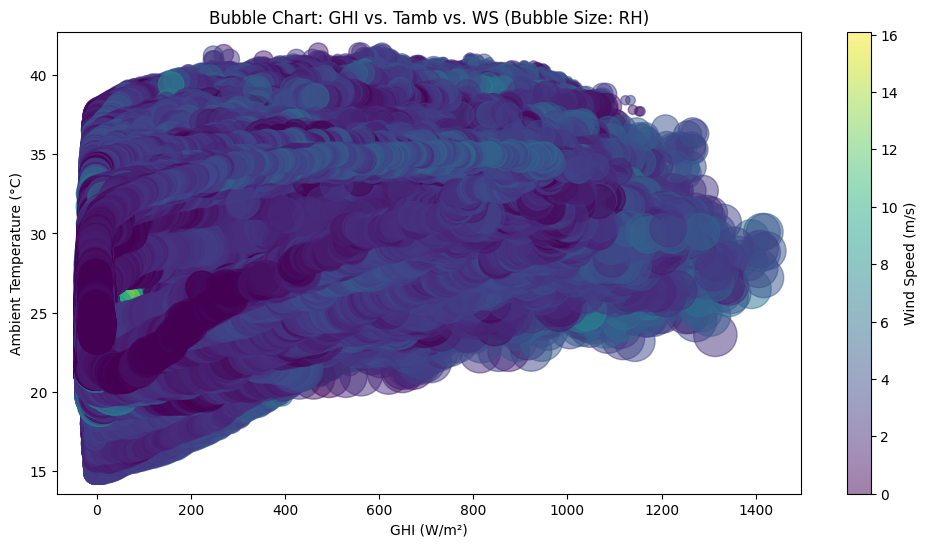

In [17]:
# Bubble chart for GHI vs. Tamb vs. WS, with RH as bubble size
mp.pyplot.figure(figsize=(12, 6))
mp.pyplot.scatter(togo_data['GHI'], togo_data['Tamb'], s=togo_data['RH']*10, alpha=0.5, c=togo_data['WS'], cmap='viridis')
mp.pyplot.colorbar(label='Wind Speed (m/s)')
mp.pyplot.xlabel('GHI (W/m²)')
mp.pyplot.ylabel('Ambient Temperature (°C)')
mp.pyplot.title('Bubble Chart: GHI vs. Tamb vs. WS (Bubble Size: RH)')
mp.pyplot.show()

In [ ]:
# 1) Drop rows with missing data
togo_data_cleaned = togo_data.dropna(axis=1, how='all')  
print("Cleaned Data:\n", togo_data_cleaned.head())

Cleaned Data:
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   GHI_zscore  
0   -0.678931  
1   -0.678931  
2   -0.678931  
3   -0.678931  
4  

In [ ]:
# Drop columns with all missing values
togo_data_cleaned = togo_data.dropna(axis=1, how='all')
print("Cleaned Data (Columns):\n", togo_data_cleaned.head())

Cleaned Data (Columns):
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1 2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2 2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3 2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4 2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   GHI_zscore  
0   -0.678931  
1   -0.678931  
2   -0.678931  
3   -0.67